In [12]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [8]:
np.random.seed(0)

In [36]:
X,y = datasets.make_moons(200, noise=0.20)

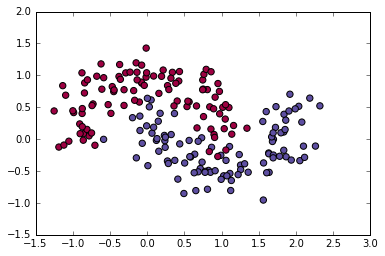

In [37]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [13]:
#Logistic Regression Model
clf = linear_model.LogisticRegressionCV()
clf.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [18]:
def plot_decision_boundary(pred_func, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h=0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

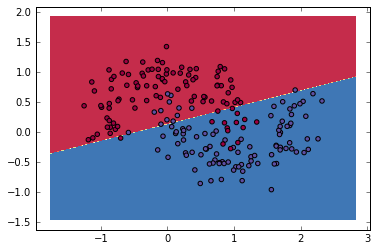

In [42]:
plot_decision_boundary(lambda x: clf.predict(x), X, y)

In [22]:
#Neural Network
num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 2

#Gradient descent parameters
epsilon = 0.01 #learning rate
reg_lambda = 0.01 #regularization rate

In [57]:
def calculate_loss(model, X, y):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    #calc loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    
    #regularization
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1. / num_examples * data_loss

In [24]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    #Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [71]:
def build_model(X, y, nn_hdim, num_passes=20000, print_loss=False):
    num_examples = len(X)
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    model = {}
    
    for i in range(0, num_passes):
        #Forward
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        #Back
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        #Add regularization
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        #Gradient descent update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        #Assign new parameters
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        #Print the loss
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, calculate_loss(model, X, y)))
        
    return model

Loss after iteration 0: 0.437245
Loss after iteration 1000: 0.063835
Loss after iteration 2000: 0.062337
Loss after iteration 3000: 0.061599
Loss after iteration 4000: 0.061146
Loss after iteration 5000: 0.060853
Loss after iteration 6000: 0.060653
Loss after iteration 7000: 0.060509
Loss after iteration 8000: 0.060399
Loss after iteration 9000: 0.060870
Loss after iteration 10000: 0.060855
Loss after iteration 11000: 0.060844
Loss after iteration 12000: 0.060834
Loss after iteration 13000: 0.060827
Loss after iteration 14000: 0.060820
Loss after iteration 15000: 0.060813
Loss after iteration 16000: 0.060807
Loss after iteration 17000: 0.060802
Loss after iteration 18000: 0.060797
Loss after iteration 19000: 0.060792


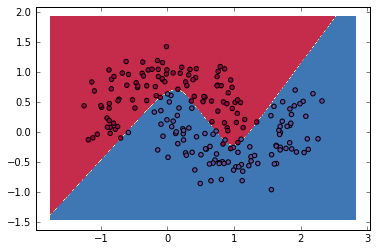

In [72]:
model = build_model(X, y, 3, print_loss=True)

plot_decision_boundary(lambda x: predict(model, x), X, y)

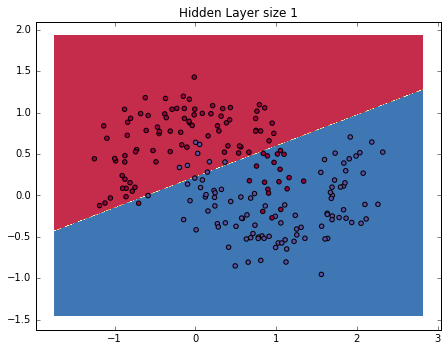

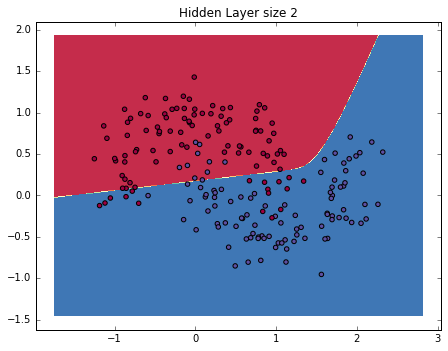

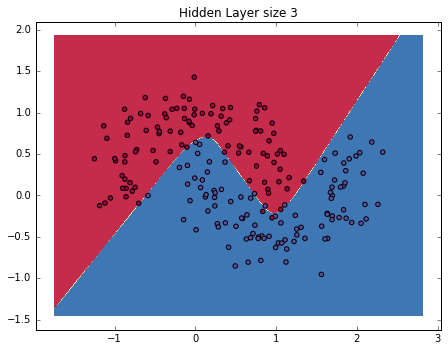

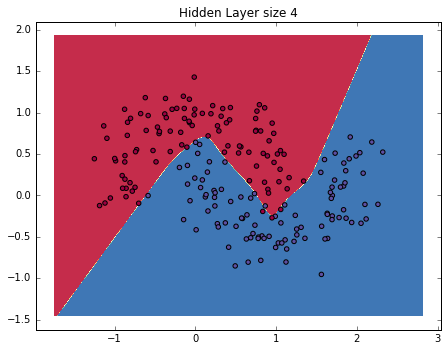

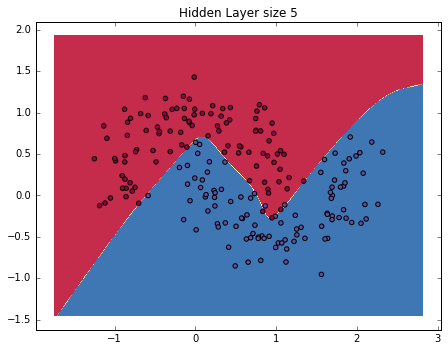

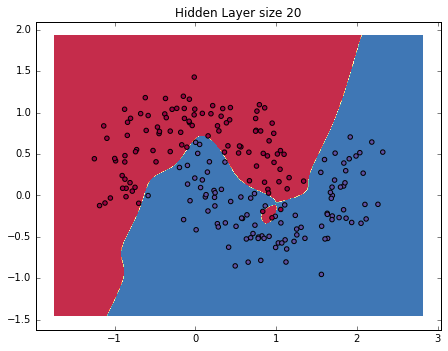

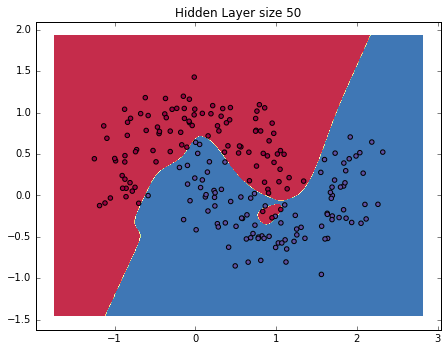

In [73]:
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.figure(figsize=(16,32))
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(X, y, nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x), X, y)
    
plt.show()